In [2]:
# ライブラリのインポート
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# データが保存されているフォルダのパスを指定
folder_path = R'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701/'

In [4]:
file_pattern = '*.csv'
files = glob.glob(f'{folder_path}/{file_pattern}')
print(files)

['C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM10.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM11.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM12.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM13.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM14.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM15.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM16.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM17.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM18.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240701\\device-monitor-240701-141228-COM3.csv', 'C:/Users/sukegawa/D

In [5]:
# データフレームのリストを作成
data_frames = []
for file in files:
    df = pd.read_csv(file)
    # ファイル名からCOM番号を抽出
    com_num = os.path.splitext(os.path.basename(file))[0].split('-COM')[-1]
    # 重複を削除し、最初に取得したデータを残す
    #df = df.groupby(['date', 'time', 'x', 'y']).first().reset_index()
    # "RSSI"の列名を""RSSI<COM番号>に変更"
    df = df.rename(columns={"RSSI": f"RSSI{com_num}"})
    data_frames.append(df)
print(data_frames)

[     date          time  RSSI10  x  y
0    7-01  14:08:09.299     -67  0  0
1    7-01  14:08:09.299     -66  0  0
2    7-01  14:08:09.822     -64  0  0
3    7-01  14:08:10.340     -63  0  0
4    7-01  14:08:10.340     -61  0  0
..    ...           ...     ... .. ..
225  7-01  14:11:50.670     -98  6  1
226  7-01  14:11:50.216     -69  6  0
227  7-01  14:11:50.216     -71  6  0
228  7-01  14:11:50.732     -72  6  0
229  7-01  14:11:54.751     -74  6  0

[230 rows x 5 columns],      date          time  RSSI11  x  y
0    7-01  14:08:09.299     -85  0  0
1    7-01  14:08:09.822     -73  0  0
2    7-01  14:08:09.822     -72  0  0
3    7-01  14:08:10.340     -73  0  0
4    7-01  14:08:10.860     -81  0  0
..    ...           ...     ... .. ..
203  7-01  14:11:49.706     -66  6  0
204  7-01  14:11:50.483     -87  6  1
205  7-01  14:11:50.216     -85  6  0
206  7-01  14:11:50.732     -67  6  0
207  7-01  14:11:54.751     -79  6  0

[208 rows x 5 columns],      date          time  RSSI12  x  y

In [6]:
# 最初のデータフレームを指定
combined_df = data_frames[0]

# 送信時刻、座標が同じm5stackのデータを横に結合
for df in data_frames[1:]:
    combined_df = pd.merge(combined_df, df, on=["date", "time", "x", "y"], how="outer")
print(combined_df)

       date          time  RSSI10  x  y  RSSI11  RSSI12  RSSI13  RSSI14  \
0      7-01  14:08:09.299   -67.0  0  0   -85.0   -73.0   -74.0   -76.0   
1      7-01  14:08:09.299   -67.0  0  0   -85.0   -73.0   -74.0   -76.0   
2      7-01  14:08:09.299   -66.0  0  0   -85.0   -73.0   -74.0   -76.0   
3      7-01  14:08:09.299   -66.0  0  0   -85.0   -73.0   -74.0   -76.0   
4      7-01  14:08:09.822   -64.0  0  0   -73.0   -75.0   -80.0   -75.0   
...     ...           ...     ... .. ..     ...     ...     ...     ...   
17960  7-01  14:11:35.175     NaN  6  1     NaN     NaN     NaN     NaN   
17961  7-01  14:11:37.182     NaN  6  1     NaN     NaN     NaN     NaN   
17962  7-01  14:11:44.781     NaN  6  1     NaN     NaN     NaN     NaN   
17963  7-01  14:11:46.908     NaN  6  1     NaN     NaN     NaN     NaN   
17964  7-01  14:11:48.932     NaN  6  1     NaN     NaN     NaN     NaN   

       RSSI15  RSSI16  RSSI17  RSSI18  RSSI3  RSSI5  RSSI6  RSSI7  RSSI8  \
0       -62.0   -58.0  

In [7]:
# 列名を並び替える
columns_order = ['date', 'time', 'x', 'y'] + [f"RSSI{num}" for num in range(3, 19)]
combined_df = combined_df[columns_order]
print(combined_df)

       date          time  x  y  RSSI3  RSSI4  RSSI5  RSSI6  RSSI7  RSSI8  \
0      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -67.0   
1      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -73.0   
2      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -67.0   
3      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -73.0   
4      7-01  14:08:09.822  0  0  -57.0  -62.0  -72.0  -81.0  -70.0  -70.0   
...     ...           ... .. ..    ...    ...    ...    ...    ...    ...   
17960  7-01  14:11:35.175  6  1    NaN    NaN    NaN    NaN    NaN    NaN   
17961  7-01  14:11:37.182  6  1    NaN    NaN    NaN    NaN    NaN    NaN   
17962  7-01  14:11:44.781  6  1    NaN    NaN    NaN    NaN    NaN    NaN   
17963  7-01  14:11:46.908  6  1    NaN  -99.0    NaN    NaN    NaN    NaN   
17964  7-01  14:11:48.932  6  1    NaN    NaN    NaN    NaN    NaN    NaN   

       RSSI9  RSSI10  RSSI11  RSSI12  RSSI13  RSSI14  RSSI15  RSSI16  RSSI1

In [8]:
# timeの昇順に並び変える
data = combined_df.sort_values("time")
data = data.reset_index(drop=True)
print(data)

       date          time  x  y  RSSI3  RSSI4  RSSI5  RSSI6  RSSI7  RSSI8  \
0      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -67.0   
1      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -73.0   
2      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -67.0   
3      7-01  14:08:09.299  0  0  -55.0  -60.0  -78.0  -73.0  -75.0  -73.0   
4      7-01  14:08:09.822  0  0  -57.0  -58.0  -79.0  -68.0  -70.0  -70.0   
...     ...           ... .. ..    ...    ...    ...    ...    ...    ...   
17960  7-01  14:11:50.732  6  0  -62.0  -85.0  -64.0    NaN  -66.0  -62.0   
17961  7-01  14:11:50.732  6  0  -62.0  -85.0  -64.0    NaN  -66.0  -92.0   
17962  7-01  14:11:50.732  6  0  -62.0  -85.0  -64.0    NaN  -66.0  -62.0   
17963  7-01  14:11:50.732  6  0  -62.0  -85.0  -64.0    NaN  -66.0  -92.0   
17964  7-01  14:11:54.751  6  0  -65.0  -71.0  -86.0  -65.0  -62.0  -68.0   

       RSSI9  RSSI10  RSSI11  RSSI12  RSSI13  RSSI14  RSSI15  RSSI16  RSSI1

In [9]:
#data[data['y'] == 1].to_csv(R'C:/Users/stomo/Desktop/study/logs/p10.csv', index=False)
#data[data['y'] == 0].to_csv(R'C:/Users/stomo/Desktop/study/logs/5t.csv', index=False)

In [10]:
# 座標ごとの総データ数
count_total = data.groupby(['x', 'y']).size().rename('data_num')

# NaNを含むデータ数
invfp_nan = data.isna().any(axis=1)
nan_count = data[invfp_nan].groupby(['x', 'y']).size().rename('nan_num')

# NaNを含まないデータ数
invfp_notnan = data.notna().all(axis=1)
notnan_count = data[invfp_notnan].groupby(['x', 'y']).size().rename('notnan_num')

# 結果をマージ
count = pd.merge(count_total, nan_count, on=["x", "y"], how="outer")
count = pd.merge(count, notnan_count, on=["x", "y"], how="outer")

# NaNを0に置き換え、int型に変換
count = count.fillna(0).astype(int)

print(count)

     data_num  nan_num  notnan_num
x y                               
0 0      5313      529        4784
  1        84       84           0
4 0      7190     1265        5925
  1        99       99           0
6 0      5195      212        4983
  1        84       84           0


In [11]:
# Nanを-200に変換
data = combined_df.fillna(-200)

In [12]:
# Nanを含むデータを削除
#data = data.dropna(how="any")

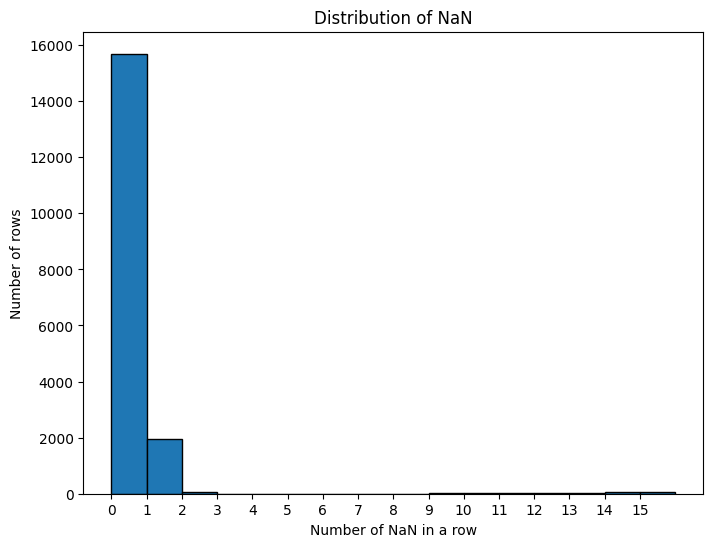

In [13]:
# Nanの数の分布をヒストグラムで表示
data_copy = data.copy()
data_copy['num_nan'] = [(data_copy.iloc[k] == -200).sum() for k in range(data_copy.shape[0])]

plt.figure(figsize=(8, 6))
plt.hist(data_copy['num_nan'], bins=range(data_copy['num_nan'].max() + 2), edgecolor='black')
plt.title('Distribution of NaN')
plt.xlabel('Number of NaN in a row')
plt.ylabel('Number of rows')
plt.xticks(range(data_copy['num_nan'].max() + 1))
plt.show()

In [14]:
# NaNの数が閾値より多い場合は削除
# threshold = 6
# data = data.drop(data_copy[data_copy['num_nan'] >= threshold].index)
# print(data)

In [15]:
# 座標ごとに50件ずつ抽出してcsvファイル作成
invfp = pd.DataFrame()
for (x, y), group in data.groupby(['x', 'y']):
    if len(group) > 0:
        if len(group) >= 50:
            invfp = pd.concat([invfp, group.sample(n=50, random_state=46)], ignore_index=True)

print(invfp.shape[0])
invfp.to_csv(R'C:/Users/sukegawa/Desktop/study/datasets/invfp/invfp_16.csv', index=False)

300
